# Plotting figures

This notebook is for the purposes of reproducing the plots presented in the manuscript and supporting information that are not included within the machine learning notebooks. These include:
  - Figure 2 and S1 (Persistence Barcode, Diagram and Image generation)
  - Figure 3 and S3 (Property vs Features plot)
  - Figures S2 (Simplex count using different filtration values)

Please make sure that this notebook is in the same directory as the data folder and the scripts:
> 1. ElementsInfo.py
> 2. PersistentImageCode.py
> 3. VariancePersistCode.py
> 4. GenerateImagePI.py

# Installations

In [1]:
!pip install gudhi
!pip install ripser
!pip install elements

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripser: filename=ripser-0.6.4-cp310-cp310-linux_x86_64.whl size=752974 sha256=de72786fb05bb15516c0174c5542f834fe46ac4a0cf47424eca9557eaf412a1d
  Stored in directory: /root/.cache/pip/wheels/c5/f5/66/f41f708b049057431155934f74e20ca6001a085fcd2e615150
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18103 sha256=ab40acdc4f70edbaf0d7467de8ad6ab76bc869c095f3e6650279d366e2e0b293
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built ripser hopcroftkarp
  P

In [4]:
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib import gridspec
import pandas as pd
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from matplotlib.ticker import MultipleLocator

from ElementsInfo import *
from PersistentImageCode import *
from VariancePersistCode import *
from GenerateImagePI import *

successfully imported ElementsInfo
Successfully imported ReadGDB
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Successfully imported PersistentImageCode
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Successfully imported VariancePersistCode


In [3]:
DatasetAuNC = pd.read_pickle('./data/AuNC/DatasetAuNC.pkl')

# Creating Persistence Barcodes and Persistence Diagrams

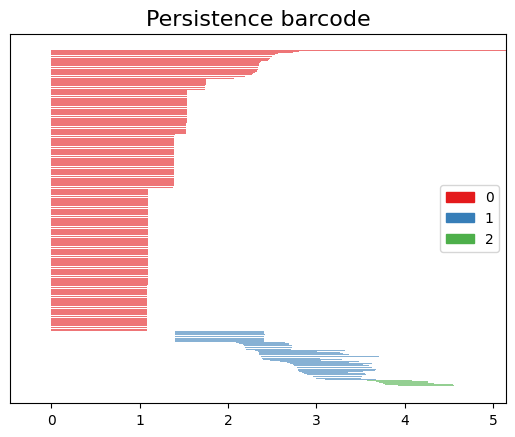

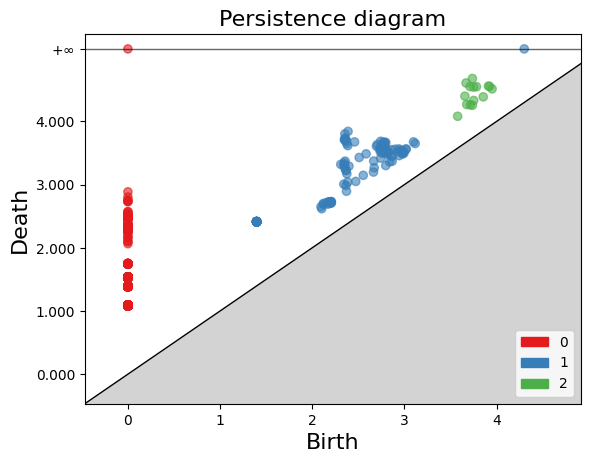

In [92]:
os.chdir("./data/AuNC/DatasetAuNC_xyz_files")

core_coordinates = []
ligand_coordinates = []
cluster_filename = "Au44_TBBT_28_c0.xyz"
df=pd.read_table(cluster_filename, delim_whitespace=True, names=['a','b','c','d'], skiprows = 2)
mat = df[['b','c','d']].to_numpy()
element_arr = df['a'].to_numpy()

for index in range(len(element_arr)):
  if element_arr[index] == "Au":
    core_coordinates.append(list(mat[index]))
  else:
    ligand_coordinates.append(list(mat[index]))

core_coordinates = np.asarray(core_coordinates)
ligand_coordinates = np.asarray(ligand_coordinates)

rips = gudhi.RipsComplex(points = list(mat), max_edge_length=5.0)

simplex_tree = rips.create_simplex_tree(max_dimension=3)
diag = simplex_tree.persistence(min_persistence=0.5)

# persistence barcode
gudhi.plot_persistence_barcode(diag)
plt.show()

# persistence diagram
gudhi.plot_persistence_diagram(diag,greyblock=True)
plt.show()


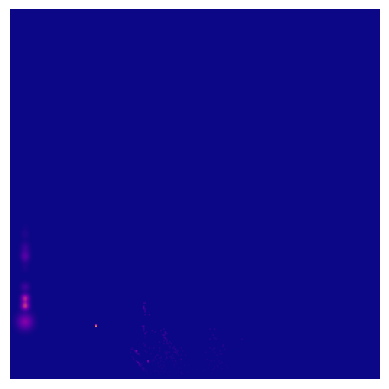

In [68]:
#Persistence Image Parameters (for visualization purposes)
resolution=128
myspread=1.3
min_bound=-0.3
max_bound=7
electroneg_addition=+0.4
electroneg_division=10
B1_buffer=0.0001
B2_buffer=0.0001

persistent_image_matrix = VariancePersistv1(
                      "Au44_TBBT_28_c0.xyz",
                      pixelx=resolution,
                      pixely=resolution,
                      myspread=myspread ,
                      myspecs={"maxBD": max_bound, "minBD":min_bound},
                      electroneg_addition=electroneg_addition,
                      electroneg_division=electroneg_division,
                      B1_buffer=B1_buffer,
                      B2_buffer=B2_buffer,
                      showplot = True
                      )

# Plotting property vs feature based on ligand type


In [ ]:
sns.set(rc={'figure.figsize':(30,30)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'black'})
sns.set(rc={"figure.dpi":100, 'savefig.dpi':600})
sns.set_style("whitegrid")

In [ ]:
def drawPieMarker(xs, ys, ratios, sizes, colors,alpha,yaxis, xaxis):
    assert sum(ratios) <= 1, 'sum of ratios needs to be < 1'

    markers = []
    previous = 0
    # calculate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x  = [0] + np.cos(np.linspace(previous, this, 10)).tolist() + [0]
        y  = [0] + np.sin(np.linspace(previous, this, 10)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = this
        markers.append({'marker':xy, 's':np.abs(xy).max()**2*np.array(sizes), 'facecolor':color, 'alpha':alpha,"lw":0})

    # ax.scatter(xs, ys, c="black", alpha = 0.25, s = 500 )
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['bottom'].set_color('000000')
    ax.spines['left'].set_linewidth(4)
    ax.spines['left'].set_color('000000')
    ax.spines['top'].set_linewidth(4)
    ax.spines['top'].set_color('000000')
    ax.spines['right'].set_linewidth(4)
    ax.spines['right'].set_color('000000')
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=10)


    # scatter each of the pie pieces to create pies
    for marker in markers:

        ax.scatter(xs, ys, **marker, )
        # plt.xlabel("Tetrahedral count", fontsize = 50,family='Arial')
        # plt.ylabel('mu', fontsize = 50,family='Arial')
        # for label in ax.get_xticklabels():
        #   label.set_fontproperties(ticks_font)
        # for label in ax.get_yticklabels():
        #   label.set_fontproperties(ticks_font)
        # plt.xticks(fontname = 'Times New Roman')
        # plt.yticks(fontname = 'Helvetica')
        plt.title(" ", fontsize = 30)
        ax.yaxis.set_major_locator(MultipleLocator(yaxis))
        ax.xaxis.set_major_locator(MultipleLocator(xaxis))


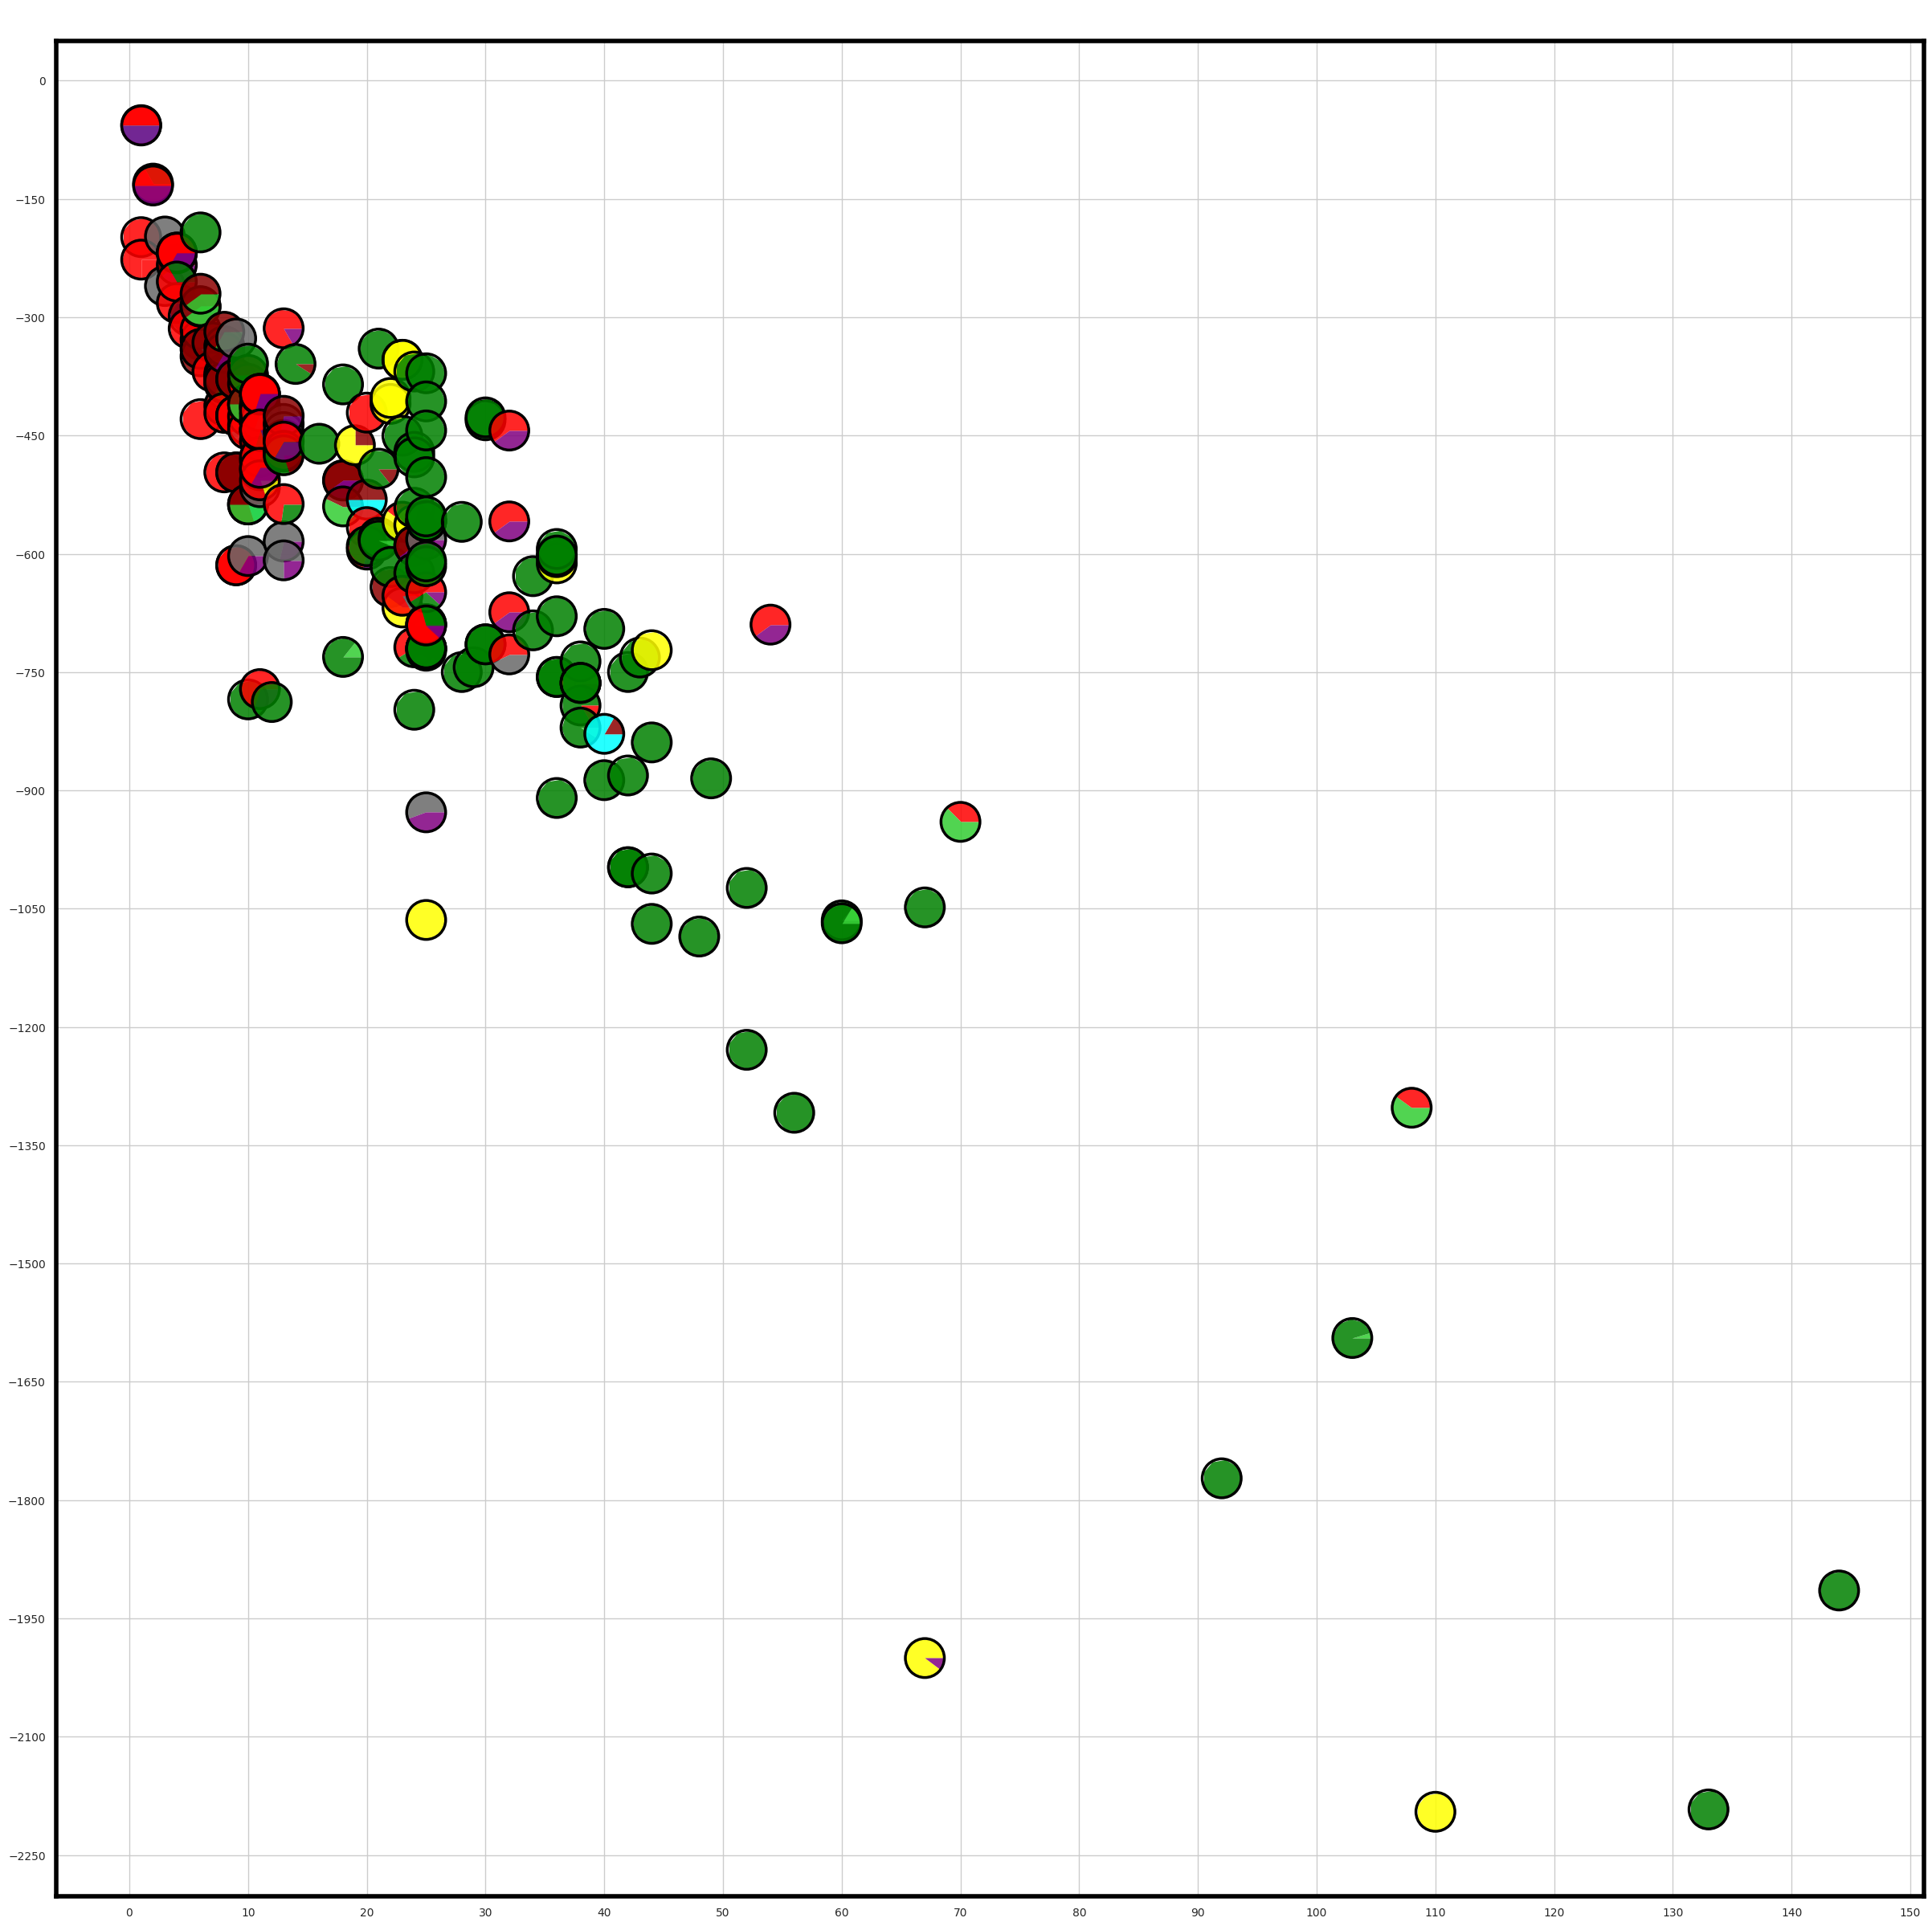

In [ ]:
import matplotlib.patheffects as path_effects
fig, ax = plt.subplots()


df = DatasetAuNC
df = df.reset_index(drop=True)

colorDict = {'PPh3':'#FF0000', 'dpp': '#8B0000','S':'#32CD32','SX':'#008000','Halogens':'#800080','CCR':'#FFFF00','NHC':'#696969','others':'#00FFFF'}
colorDict2 = {'PPh3':'white', 'dpp': 'white','S':'white','SX':'green','Halogens':'white','CCR':'white','NHC':'white','others':'white'}


for i in range(len(df)):
  # if df["Ligands1"][i] != "TBBT" and df["Ligands2"][i] != "TBBT" and df["Ligands3"][i] != "TBBT": continue
  # if df["Quantity2"][i] != 0 or df["Quantity3"][i] != 0: colorDict = colorDict2
  # else: colorDict = colorDict1

  x = df["core"][i]
  y = df["u298"][i]
  tot = df["Quantity1"][i].astype(float) + df["Quantity2"][i].astype(float) + df["Quantity3"][i].astype(float)
  r1 = df["Quantity1"][i].astype(float)/tot
  r2 = df["Quantity2"][i].astype(float)/tot
  r3 = df["Quantity3"][i].astype(float)/tot

  # if df["Type1"][i] != "dpp" and df["Type2"][i] != "dpp" and df["Type3"][i] != "dpp": continue
  # if df["Tetrahedral_count"][i] >= 60 : continue

  ratios = [r1]
  if r2 != 0: ratios.append(r2)
  if r3 != 0: ratios.append(r3)

  size = [450]
  c1 = colorDict[str(df["Type1"][i])]
  c2 = colorDict[str(df["Type2"][i])]
  c3 = colorDict[str(df["Type3"][i])]

  colors = [c1]
  if r2 != 0:
    colors.append(c2)
  if r3 != 0:
    colors.append(c3)

  drawPieMarker(xs=x,
              ys=y,
              ratios=ratios,
              sizes=[1200],
              colors=colors,
              alpha = 0.85,
              yaxis = 150,
              xaxis = 10)
  plt.scatter(x,y,facecolors='none', edgecolors="black",s=1220,linewidth=2.5)

plt.savefig("All_ligands_Core_U298.pdf", dpi = 600)

# Plotting the change in simplicial components with different filtration values

In [70]:
# Simplcial complex analysis
def Simplex_analyze(Core_coordinates, bond_length_limit):
  rips= gudhi.RipsComplex(points=list(Core_coordinates), max_edge_length=10.0)
  simplex_tree = rips.create_simplex_tree(max_dimension=3)
  simplex_generator = simplex_tree.get_skeleton(3)

  Tetrahedra_list = []
  Vertices_of_tetrahedra = []
  Overlapping_triangles = []
  Unconnected_triangles = []
  Triangles_with_1_shared_vertex = []
  Triangles_with_2_shared_vertices = []

  for simplex in simplex_generator:
    if simplex[1] >= bond_length_limit: continue
    if len(simplex[0]) == 4: #simplex[0]: list of vertices, simplex[1]: birth filtration
      Tetrahedra_list.append(simplex)
      for vertex in simplex[0]:
        if vertex not in Vertices_of_tetrahedra:
          Vertices_of_tetrahedra.append(vertex)

  rips= gudhi.RipsComplex(points=list(Core_coordinates), max_edge_length=10.0)
  simplex_tree = rips.create_simplex_tree(max_dimension=3)
  simplex_generator = simplex_tree.get_skeleton(3)

  for simplex in simplex_generator:
    Shared_count_arr = []

    if simplex[1] >= bond_length_limit: continue
    if len(simplex[0]) != 3: continue

    if len(Tetrahedra_list) == 0: Unconnected_triangles.append(simplex[0])
    else:
      for tetrahedra in Tetrahedra_list:
        Shared_count_arr.append(len(set(simplex[0]) & set(tetrahedra[0])))

      if max(Shared_count_arr) == 3: Overlapping_triangles.append(simplex)
      elif max(Shared_count_arr) == 2: Triangles_with_2_shared_vertices.append(simplex)
      elif max(Shared_count_arr) == 1: Triangles_with_1_shared_vertex.append(simplex)
      else: Unconnected_triangles.append(simplex)

  return {"Tetrahedral_count": len(Tetrahedra_list), "Unconnected_triangles_count": len(Unconnected_triangles),
          "Triangles_with_1_shared_vertex_count":len(Triangles_with_1_shared_vertex),
          "Triangles_with_2_shared_vertices_count": len(Triangles_with_2_shared_vertices)}


In [71]:
"""
Simplex analysis
"""
filtration_arr = []

for bond_length_limit in [3.0, 3.5, 4.0, 4.5, 5.0]:
  Tetrahedral_count_arr = []
  Unconnected_triangles_count_arr = []
  Triangles_with_1_shared_vertex_count_arr = []
  Triangles_with_2_shared_vertices_count_arr = []
  files = []
  os.chdir("/content/drive/MyDrive/AuNC database/Optimized_geometries")
  for idx in range(len(DatasetAuNC)):
    try:
      filename = DatasetAuNC["Filename"][idx] + ".xyz"
      df=pd.read_table(filename, delim_whitespace=True, names=['a','b','c','d'],skiprows = 2) # skip the first 2 lines of xyz files
      mat = df[['b','c','d']].to_numpy()
      ElementArr = df['a'].to_numpy()

      Core_coordinates = []

      for index in range(len(ElementArr)):
        if ElementArr[index] != "Au": continue
        Core_coordinates.append(mat[index])

      Dict = Simplex_analyze(Core_coordinates, bond_length_limit = bond_length_limit)

      Tetrahedral_count_arr.append(Dict["Tetrahedral_count"])
      Unconnected_triangles_count_arr.append(Dict["Unconnected_triangles_count"])
      Triangles_with_1_shared_vertex_count_arr.append(Dict["Triangles_with_1_shared_vertex_count"])
      Triangles_with_2_shared_vertices_count_arr.append(Dict["Triangles_with_2_shared_vertices_count"])

    except:
      print("error at: ", idx)
      continue

  filtration_arr.append([bond_length_limit, [Tetrahedral_count_arr, Unconnected_triangles_count_arr, Triangles_with_1_shared_vertex_count_arr, Triangles_with_2_shared_vertices_count_arr]])


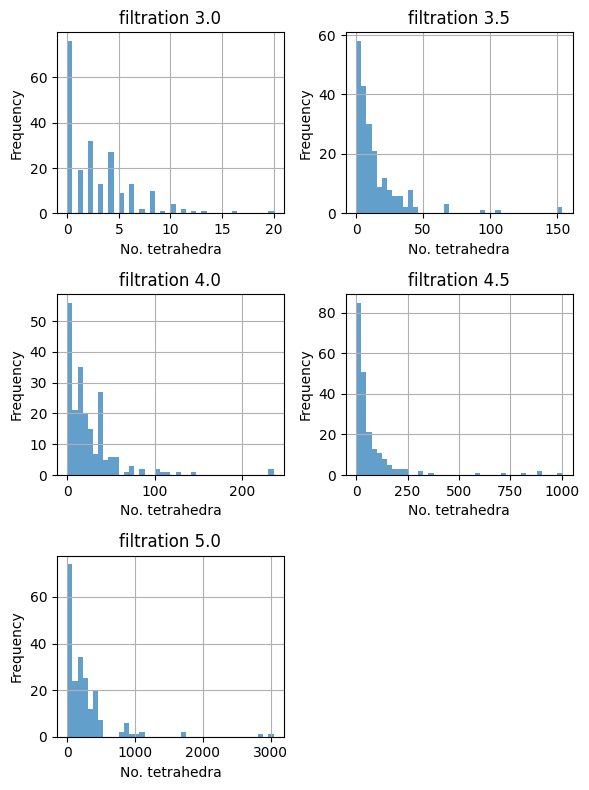

In [90]:
os.chdir("/content/drive/MyDrive/AuNC database")

data_list_1 = filtration_arr[0][1][0]
data_list_2 = filtration_arr[1][1][0]
data_list_3 = filtration_arr[2][1][0]
data_list_4 = filtration_arr[3][1][0]
data_list_5 = filtration_arr[4][1][0]

data_lists = [data_list_1, data_list_2, data_list_3, data_list_4, data_list_5]
labels = ['filtration 3.0', 'filtration 3.5', 'filtration 4.0', 'filtration 4.5', 'filtration 5.0']

# Create a 3x2 grid of subplots using gridspec
fig = plt.figure(figsize=(6, 8))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1])

for i, (data, label) in enumerate(zip(data_lists, labels)):
    if i < 2:  # First row
        ax = plt.subplot(gs[0, i])
    elif i < 4:  # Second row
        ax = plt.subplot(gs[1, i - 2])
    else:  # Third row
        ax = plt.subplot(gs[2, i - 4])

    ax.hist(data, bins=40, alpha=0.7)
    ax.set_title(label)
    ax.set_xlabel('No. tetrahedra')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure
plt.savefig("filtration_change.pdf", dpi=600)

# Show the plots
plt.show()
